## Imports

In [ ]:
#--------------------------
MOUNT_GOOGLE_DRIVE = True
#--------------------------

if(MOUNT_GOOGLE_DRIVE==True):
  from google.colab import drive
  drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/Shareddrives/NLP-quora_challenge/

/content/gdrive/Shareddrives/NLP-quora_challenge


In [ ]:
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

## Load Data

In [ ]:
# use this to train and VALIDATE your solution
train_df = pd.read_csv("/content/gdrive/Shareddrives/NLP-quora_challenge/quora-question-pairs/train.csv.zip")

In [ ]:
A_df, te_df = sklearn.model_selection.train_test_split(train_df, test_size=0.05, random_state=123)
tr_df, va_df = sklearn.model_selection.train_test_split(A_df, test_size=0.05, random_state=123)
print('tr_df.shape=',tr_df.shape)

tr_df.shape= (364871, 6)


In [ ]:
tr_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
63045,63045,109774,109775,What do final year students feel?,How do I make a 3D printer as my final year pr...,0
240893,240893,111370,118283,Does Clean Master really works?,Is the Clean Master app for Android really use...,0
90599,90599,152006,152007,Who was the winner of MasterChef India 3?,Who is the winner of MasterChef India season 5?,0
280745,280745,16199,9037,How can I lose weight quickly? Need serious help.,What is the easiest way to lose weight faster?,1
388675,388675,521099,521100,Do you like Angular 2 and why?,What exactly is Angular 2?,0


In [ ]:
va_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
61828,61828,107881,107882,What exactly is a sociopath?,Is he a sociopath?,0
140245,140245,222899,222900,My Motorola Moto G phone fell down and the gla...,I have Moto G which has Corning Gorilla 3. Doe...,0
242224,242224,354403,149587,British Royal Family: Does Queen Elizabeth wan...,Royalty: Why did Diana become a princess when ...,0
61330,61330,107101,107102,How easy is to learn Informatica tool for an i...,I complaint his with adjutant?,0
25534,25534,47584,47585,How should I reduce my belly naturally?,How do I reduce belly fat in minimal time?,1


## Analysis of the data

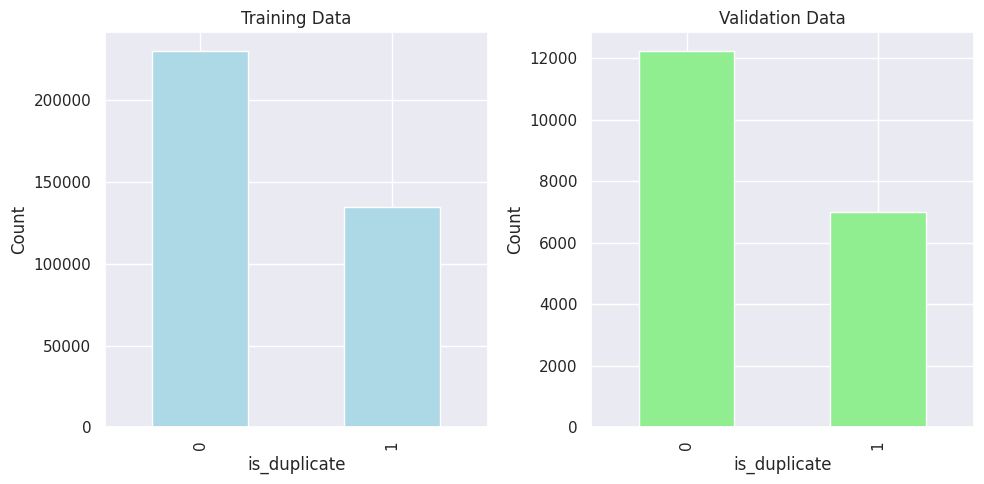

In [ ]:

# Group by 'is_duplicate' and count the number of IDs for training and validation data
tr_counts = tr_df.groupby('is_duplicate')['id'].count()
va_counts = va_df.groupby('is_duplicate')['id'].count()

# Create a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot training data counts
tr_counts.plot(kind='bar', ax=axs[0], color='lightblue')
axs[0].set_title('Training Data')

# Plot validation data counts
va_counts.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Validation Data')

# Set common labels
for ax in axs:
    ax.set_xlabel('is_duplicate')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
qids = pd.Series(tr_df['qid1'].to_list() + tr_df['qid2'].to_list())
num_unique_questions = len(np.unique(qids))
non_unique_questions = np.sum(qids.value_counts() > 1)
percentage_non_unique_questions = ( non_unique_questions / num_unique_questions ) * 100

print("Statistics on Question IDs:")
print(f"Number of Unique Questions: {num_unique_questions}")
print(f"Number of Non-Unique Questions: {non_unique_questions}")
print(f"Percentage of Non-Unique Questions: {percentage_non_unique_questions:.2f}%")
print(f"Maximum Times a Question Got Repeated: {qids.value_counts().iloc[0]}")

Statistics on Question IDs:
Number of Unique Questions: 495585
Number of Non-Unique Questions: 99055
Percentage of Non-Unique Questions: 19.99%
Maximum Times a Question Got Repeated: 148


- siamese model !!!